## Exercício da aula passada

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Exercício

Vamos fazer a predição do dataset de diabetes e comparar os resultados com o KNN

1 - Instancie o Standard Scaler

2 - Faça o fit transform dos dados de treino e o transform dos dados de teste

3 - Faça o fit com os dados escalados, e o target não escalado

4 - Gere a predição com os dados de teste escalados

5 - Analise as metricas usando matriz de confusão e classification report

In [3]:
diabetes = pd.read_csv('./diabetes_prediction_dataset.csv')

In [4]:
diabetes = diabetes.drop(columns=['gender', 'smoking_history'])

In [5]:
X = diabetes.drop(columns='diabetes')
y = diabetes['diabetes']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

In [7]:
scaler = StandardScaler()

In [8]:
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [9]:
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [11]:
## Heurística para selecionar o "melhor" k para o KNNClassifier

# from sklearn.metrics import recall_score

# ks = []
# recalls = []
# for k in range(3, 20):
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(X_train_ss, y_train)
#     y_pred = model.predict(X_test_ss)
#     rec = recall_score(y_test, y_pred)
#     recalls.append(rec)
#     ks.append(k)

# plt.figure(figsize=(12,8))
# plt.plot(ks, recalls, '-bo')
# plt.xlabel('k', fontsize = 15)
# plt.ylabel('Recall', fontsize = 15)
# plt.title('Recall x Número K', fontsize = 15)
# plt.show(True)
# best_k = np.argmax(recalls)+1
# print('Melhor k:', best_k)

In [10]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_ss, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred_train = model.predict(X_train_ss)
y_pred_test = model.predict(X_test_ss)

In [12]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     73200
           1       0.94      0.77      0.84      6800

    accuracy                           0.98     80000
   macro avg       0.96      0.88      0.92     80000
weighted avg       0.98      0.98      0.97     80000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.68      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.83      0.87     20000
weighted avg       0.96      0.96      0.96     20000



In [13]:
model = LogisticRegression()
model.fit(X_train_ss, y_train)

LogisticRegression()

In [14]:
y_pred_train = model.predict(X_train_ss)
y_pred_test = model.predict(X_test_ss)

In [15]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     73200
           1       0.87      0.62      0.73      6800

    accuracy                           0.96     80000
   macro avg       0.92      0.81      0.85     80000
weighted avg       0.96      0.96      0.96     80000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



# Aula 6 - Ferramentas especiais e Otimização de Hiperparametros

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Pipeline
- 2) GridSearch
- 3) RandomSearch


## 1) Pipeline

Vamos agora ver algumas ferramentas especiais do sklearn que nos ajudam no desenvolvimento de modelos!

### Pipeline

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

**Para o train-test split normal**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [19]:
df = pd.read_csv('./breast_cancer.csv')

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.2, random_state=42,
                                                stratify=y)

In [22]:
scaler = StandardScaler()

X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))] 
## Dentro da lista vai uma quantidade qualquer de parametros na seguinte estrutura
## ("nome_da_coisa", ClasseDaCoisa)

In [24]:
pipe = Pipeline(lista_etapas)

In [25]:
set_config(display='diagram')

In [26]:
pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [28]:
y_pred_test = pipe.predict(X_test)

In [21]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
# plt.show()

# print(classification_report(y_test, y_pred_test))

# print("\n# ====================\n")


# y_pred_train = pipe.predict(X_train)

# ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
# plt.show()

# print(classification_report(y_train, y_pred_train))

**Para a validação cruzada**

In [33]:
df = pd.read_csv('./breast_cancer.csv')

X = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42,
                                                   stratify = y)

lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate

In [36]:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator = pipe,
              X=X_train, y=y_train,
              cv=grupo, scoring=metrica)

df_results = pd.DataFrame(results)

In [37]:
df_results.describe()

,fit_time,score_time,test_score
count,10.000000,10.000000,10.000000
mean,0.005301,0.063200,0.905882
std,0.001338,0.167886,0.096856
min,0.003996,0.008997,0.705882
25%,0.004252,0.009000,0.838235
50%,0.005000,0.009503,0.941176
75%,0.005752,0.011752,0.985294
max,0.008002,0.540994,1.000000


Uma boa ideia é usar o [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), pois ele mantém a estratificação do target dentro de cada split!

Isso é sobretudo importante pra dados desbalanceados (no target)

### 3) Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

É muito comum também passarmos o **Pipeline** como argumento do gridsearch!

Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). 

Vamos ver a seguir como esta estrutura funciona:

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

Com a validação cruzada, garantimos uma avaliação justa de cada um dos modelos candidatos (cada um construído com uma combinação diferente de hiperparâmetros).

Assim, sabemos que a melhor combinação de hiperparâmetros a ser encontrada não estará de qualquer forma "overfitada" em particularidades da base de treino!

Vamos colocar tudo em uma única célula:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

In [44]:
df = pd.read_csv("./breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id', "Unnamed: 32"])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================
## chave: Nome do objeto no pipe, dois underscore, nome do hiperparametro
## valor: lista de parametros que quero testar
param_grid = {"knn__weights" : ['distance', 'uniform'],
              "knn__metric" : ['manhattan', 'euclidean', 'minkowski'],
              "knn__n_neighbors" : range(3, 20)}

## Verbose 10 => Mostra o que esta acontecendo com prints enquanto roda
grid_knn = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 102 candidates, totalling 1020 fits
[CV 1/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 1/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 2/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 3/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 4/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 5/10; 1/102] EN

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=M),
             verbose=10)

In [45]:
set_config(display='diagram')

In [46]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=M),
             verbose=10)

O GS treinado tem diversos atributos super úteis e interessantes! Vamos dar uma olhada neles:

`.best_estimator_`: retorna quais as escolhas do Pipeline que produziram o melhor modelo. No que diz respeito ao modelo, temos exatamente quais os parâmetros escolhidos!

In [83]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [84]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

`.best_score_`: retorna a **média cross-validada da métrica de interesse** do melhor modelo. Como esse é o valor médio construído usando CV, este é estatisticamente o valor mais realístico a ser atribuído à performance do modelo!

In [85]:
grid_knn.best_score_

0.9411764705882353

`.cv_results_`: diversas informações do processo feito pelo GS

In [87]:
pd.DataFrame(grid_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004903,0.001818,0.002996,0.000773,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
1,0.004006,0.000632,0.003400,0.000491,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
2,0.004297,0.001102,0.002799,0.000401,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
3,0.004000,0.000632,0.003499,0.000500,manhattan,4,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.882353,0.823529,0.764706,1.0,0.941176,0.941176,0.923529,0.079139,13
4,0.004702,0.000781,0.003721,0.000623,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.004499,0.000920,0.004203,0.000598,minkowski,17,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.823529,0.823529,0.764706,1.0,1.000000,0.882353,0.905882,0.088039,52
98,0.004548,0.000722,0.003234,0.000396,minkowski,18,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.823529,0.823529,0.764706,1.0,1.000000,0.882353,0.905882,0.088039,52
99,0.004253,0.000683,0.003398,0.000661,minkowski,18,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.823529,0.823529,0.764706,1.0,0.941176,0.882353,0.900000,0.083397,73
100,0.004899,0.000943,0.003302,0.000783,minkowski,19,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.823529,0.823529,0.764706,1.0,1.000000,0.882353,0.905882,0.088039,52


In [94]:
def my_refit_criteria(cv_results_):
    return np.argmax(cv_results_['mean_test_recall'] + cv_results_['mean_test_f1'])

Agora, com duas métricas:

In [24]:
df = pd.read_csv("datasets/breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label="M")
metrica2 = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 20)}

grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring={"recall" :metrica1, "f1" : metrica2}, ## Agora é um dict com as metricas
                        cv=splitter,
                        verbose=10,
                        refit=my_refit_criteria) ## Criterio de qual é o melhor modelo entre as metricas

grid_knn.fit(X_train, y_train)

In [97]:
df_results_multi_metric = pd.DataFrame(grid_knn.cv_results_)

In [106]:
df_results_multi_metric

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_recall,split1_test_recall,...,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.004394,0.000489,0.003271,0.000557,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.962453,0.047310,4
1,0.004260,0.000978,0.004394,0.000663,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.962453,0.047310,4
2,0.004301,0.000639,0.003600,0.000490,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.909091,0.83871,0.971429,1.000000,0.969697,0.953898,0.046062,15
3,0.003603,0.000665,0.004006,0.000448,manhattan,4,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.937500,0.903226,0.83871,1.000000,0.969697,0.969697,0.955633,0.050343,14
4,0.004601,0.001126,0.003845,0.000626,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.004303,0.000643,0.004194,0.000395,minkowski,17,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.903226,0.903226,0.83871,1.000000,1.000000,0.937500,0.945558,0.054126,51
98,0.004198,0.000596,0.003299,0.000458,minkowski,18,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.903226,0.903226,0.83871,1.000000,1.000000,0.937500,0.945558,0.054126,51
99,0.004789,0.000973,0.004309,0.000459,minkowski,18,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.903226,0.903226,0.83871,1.000000,0.969697,0.937500,0.942528,0.051791,72
100,0.004199,0.000745,0.003498,0.000500,minkowski,19,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",1.0,0.823529,...,1.0,0.903226,0.903226,0.83871,1.000000,1.000000,0.937500,0.945558,0.054126,51


In [104]:
df_results_multi_metric[df_results_multi_metric['param_knn__n_neighbors'] == 5][['mean_test_f1', 'mean_test_recall']]

,mean_test_f1,mean_test_recall
4,0.965310,0.941176
5,0.965310,0.941176
38,0.945304,0.905882
39,0.945304,0.905882
72,0.945304,0.905882
73,0.945304,0.905882


In [102]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

Podemos mudar a métrica segundo a qual otimizaremos os hiperparâmetros!

Agora sim, podemos avaliar a generalização final (base de teste)

In [25]:
y_pred_test = grid_knn.predict(X_test)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

Voltando pro recall:

In [26]:
df = pd.read_csv("datasets/breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label="M")
metrica2 = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 20)}

grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring={"recall" :metrica1, "f1" : metrica2}, ## Agora é um dict com as metricas
                        cv=splitter,
                        verbose=10,
                        refit='recall') ## Criterio de qual é o melhor modelo entre as metricas

grid_knn.fit(X_train, y_train)

In [27]:
y_pred_test = grid_knn.predict(X_test)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# 4) Random Search

O GridSearch é um excelente método para buscar hiperparâmetros de um estimador, mas tem dois principais pontos fracos:

- E se a combinação "ótima" de hiperparâmetros não estiver dentro da grade especificada? Nesse caso, o GridSearch vai chegar numa solução boa, mas não podemos garantir de fato que ela seja a melhor, visto que ele nunca vai estar olhando para a região correta.
- Para resolver a questão anterior, e se nós aumentássemos a grade informada para "cobrir uma área maior"? Nesse caso teríamos um problema de *explosão combinatória*. Vejamos um caso de dois hiperparâmetros de caráter contínuo:
    - Se cada um deles assumir 5 valores, temos 25 experimentos (que pode ser multiplicado por 5 ou 10, dependendo do cross validation que usarmos).
    - Se cada um deles assumir 10 valores, esse valor sobe para 100 experimentos
    - Se cada um deles assumir 20 valores, temos 400 experimentos
    - Para 40 valores, 1600.
    - 80 valores, 6400
    - ...
Para uma variável contínua, ela pode assumir infinitos valores, então para garantir matematicamente que vamos encontrar a solução ótima, temos de explorar infinitas possibilidades, algo que não possuímos tempo ou recursos computacionais para conseguir.
- Um terceiro ponto que precisamos ter em mente é mais voltado para o ponto de vista do negócio. Mesmo que algumas combinações sejam exploradas no GridSearch, pode ser que elas nem seja de interesse do negócio. Ainda assim, o método "gasta recursos computacionais" para explorar essas soluções.

É nesse contexto que entra o método de **Random Search** ou Busca Aleatória.

Ao invés de realizar uma busca bruta, onde todas as combinações são exploradas, o RandomSearch realiza uma amostragem aleatória de valores dos hiperparâmetros informados e somente depois realiza as combinações para o experimentador avaliar segundo o scoring.

<img src="https://miro.medium.com/max/1400/1*9W1MrRkHi0YFmBoHi9Y2Ow.png" width=500>

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
df = pd.read_csv("datasets/breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

recall = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__algorithm" : ['ball_tree', 'kd_tree', 'brute'],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 100)}

rs_knn = RandomizedSearchCV(estimator=pipe, 
                        param_distributions=param_grid,
                        scoring=recall, ## Agora é um dict com as metricas
                        cv=splitter,
                        n_iter=40,
                        verbose=10) ## Criterio de qual é o melhor modelo entre as metricas

rs_knn.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance
[CV 1/10; 1/40] END knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 2/10; 1/40] START knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance
[CV 2/10; 1/40] END knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 1/40] START knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance
[CV 3/10; 1/40] END knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 1/40] START knn__algorithm=ball_tree, knn__metric=manhattan, knn__n_neighbors=60, knn__weights=distance
[CV 4/10; 1/40] END knn__algorithm=ball_tree, 

[CV 5/10; 4/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 4/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform
[CV 6/10; 4/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 4/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform
[CV 7/10; 4/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 4/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform
[CV 8/10; 4/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 9/10; 4/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=41, knn__weights=uniform
[CV 

[CV 2/10; 8/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 8/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform
[CV 3/10; 8/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 4/10; 8/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform
[CV 4/10; 8/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 8/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform
[CV 5/10; 8/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform;, score=0.647 total time=   0.0s
[CV 6/10; 8/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=70, knn__weights=uniform
[CV 

[CV 2/10; 12/40] END knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 3/10; 12/40] START knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform
[CV 3/10; 12/40] END knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 12/40] START knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform
[CV 4/10; 12/40] END knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 12/40] START knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform
[CV 5/10; 12/40] END knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=uniform;, score=0.647 total time=   0.0s
[CV 6/10; 12/40] START knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=72, knn__weights=unif

[CV 2/10; 16/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 16/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform
[CV 3/10; 16/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 4/10; 16/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform
[CV 4/10; 16/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 16/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform
[CV 5/10; 16/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=87, knn__weights=uniform;, score=0.647 total time=   0.0s
[CV 6/10; 16/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n

[CV 2/10; 20/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 20/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance
[CV 3/10; 20/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 20/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance
[CV 4/10; 20/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 20/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance
[CV 5/10; 20/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weights=distance;, score=0.647 total time=   0.0s
[CV 6/10; 20/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=78, knn__weigh

[CV 6/10; 24/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 24/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 7/10; 24/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 24/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 8/10; 24/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 24/40] START knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 9/10; 24/40] END knn__algorithm=ball_tree, knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 24/40] START knn__algorithm=ball_tree, knn__metric=minkowski

[CV 6/10; 28/40] END knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 28/40] START knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance
[CV 7/10; 28/40] END knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 28/40] START knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance
[CV 8/10; 28/40] END knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 9/10; 28/40] START knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance
[CV 9/10; 28/40] END knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbors=75, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 28/40] START knn__algorithm=kd_tree, knn__metric=minkowski, knn__n_neighbo

[CV 9/10; 32/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 32/40] START knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 32/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 33/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=90, knn__weights=uniform
[CV 1/10; 33/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=90, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 2/10; 33/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=90, knn__weights=uniform
[CV 2/10; 33/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=90, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 33/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=90, knn__weights=un

[CV 10/10; 36/40] END knn__algorithm=brute, knn__metric=minkowski, knn__n_neighbors=76, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 1/10; 37/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=uniform
[CV 1/10; 37/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 2/10; 37/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=uniform
[CV 2/10; 37/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 37/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=uniform
[CV 3/10; 37/40] END knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 4/10; 37/40] START knn__algorithm=brute, knn__metric=euclidean, knn__n_neighbors=80, knn__weights=un

[CV 10/10; 40/40] END knn__algorithm=brute, knn__metric=manhattan, knn__n_neighbors=50, knn__weights=distance;, score=0.824 total time=   0.0s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=40,
                   param_distributions={'knn__algorithm': ['ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__metric': ['manhattan',
                                                        'euclidean',
                                                        'minkowski'],
                                        'knn__n_neighbors': range(3, 100),
                                        'knn__weights': ['distance',
                                                         'uniform']},
                   scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [112]:
print('Melhores Parâmetros:')
print(rs_knn.best_params_)
print('Melhor Métrica Média:')
print(rs_knn.best_score_)

Melhores Parâmetros:
{'knn__weights': 'uniform', 'knn__n_neighbors': 9, 'knn__metric': 'minkowski', 'knn__algorithm': 'kd_tree'}
Melhor Métrica Média:
0.9176470588235294


[[71  1]
 [ 5 37]]


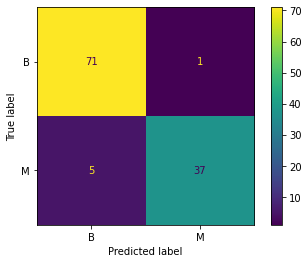

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        72
           M       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


# ====================

[[284   1]
 [ 11 159]]


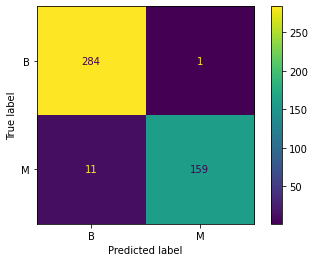

              precision    recall  f1-score   support

           B       0.96      1.00      0.98       285
           M       0.99      0.94      0.96       170

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [114]:
y_pred_test = rs_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = rs_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

## Exercício

Vamos avaliar a qualidade de alguns vinhos. Use o Wine Dataset e vamos trabalhar.

1. Explore os dados, veja quais padrões existem e decida quais tratamentos são pertinentes

2. Prepare uma pipeline e treine o modelo usando cross validation

3. Faça uma busca e otimização de hiperparâmetros (usando GridSearch ou RandomSearch), para maximizar uma métrica de interesse

4. Avalie se o modelo pode ser colocado em produção

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
wine_data = pd.read_csv('./winequality-red.csv')


wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
# Dividir os dados entre features (X) e o alvo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [7]:
# Definir a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Normalização das features
    ('model', RandomForestClassifier(random_state=42))  # Modelo de Random Forest
])

In [8]:
# Avaliar o modelo usando Cross-Validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Accuracy mean score:", scores.mean())

Accuracy mean score: 0.565985501567398


In [13]:
from sklearn.model_selection import GridSearchCV

# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Configurar a busca com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Melhor combinação de hiperparâmetros
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Best cross-validation score: 0.5878820532915361


In [14]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o melhor modelo encontrado
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.68      0.75      0.71       130
           6       0.57      0.66      0.61       132
           7       0.56      0.33      0.42        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.59      0.62      0.60       320



C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE nos dados de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Configurar a pipeline (sem o SMOTE dentro dela)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Parâmetros para GridSearch
param_grid = {
    "classifier__weights": ['uniform'],
    "classifier__metric": ['manhattan', 'euclidean'],
    "classifier__n_neighbors": range(3,7)
}

# GridSearch com F1-score
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Avaliar no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

ValueError: Invalid parameter 'classifier' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].